In [1]:
import pandas as pd
from collections import Counter
import pprint
import pickle

def dump(obj,filename):
    filehandler = open(filename,"wb")
    pickle.dump(obj,filehandler,protocol=2)
    filehandler.close()

def load(filename):
    file = open(filename,'rb')
    obj = pickle.load(file)
    file.close()
    return obj

#### Load data

In [2]:
df = load('df_sel_entities_sentiment_category_p2.pkl')
print(df.shape)
print(type(df))

(18340, 19)
<class 'pandas.core.frame.DataFrame'>


#### Comparison between entities
#### 1) extract all entities and search in the data frame
#### 2) go line by line looking for entities
#### I will try 1

In [3]:
from collections import Counter
def get_most_common(df, colname):
    count_dict = Counter(df[colname])
    return count_dict.most_common(100)

In [13]:
df_pepsi = df[df['Category']=='Pepsi']
df_coke = df[df['Category']=='Coke']
cokeEntitySet = set([]);
pepsiEntitySet = set([]);

for entry in df_coke.loc[:,'entities']:
    temp = entry.split("_")
    for t in temp:
        cokeEntitySet.add(str(t))
for entry in df_pepsi.loc[:,'entities']:
    temp = entry.split("_")
    for t in temp:
        pepsiEntitySet.add(str(t))

commonEntitySet = list(cokeEntitySet.intersection(pepsiEntitySet))
print(commonEntitySet)

['', 'general mills', 'alm', 'pep', 'hp', 'itc', 'yellow', 'nasdaq', 'johnson johnson', 'the denver post', 'bellanaija', 'kraft foods', 'sony', 'llc', 'mcdonalds', 'ps4', 'associated press', 'sunkist', 'spotify', 'giant', 'ebay', 'pizza hut', 'susquehanna', 'mcdonald', 'ddb', 'costco', 'the 20th international congress of nutrition', 'imo', 'sugar', 'the associated press', 'tm', 'black', 'gatorade', 'treasury', 'pcb', 'monarch airlines', 'the world trade center', 'nyse', 'morgan stanley', 'hiv', 'utc', 'read', 'bloomberg news', 'paradise beverages', 'dc', 'nsrgy', 'amazon', 'vegas', 'facebook', 'starbucks', 'prof', 'miller brewing', 'galaxy', 'now', 'hfcs', 'chanel', 'cmo', 'united nation', 'fortune', 'hotel', 'mb', 'toyota', 'ge', 'dr pepper snapple', 'google alerts', 'malone', 'interpublic group', 'monsanto', 'paris fashion week', 'latest news', 'coors', 'ups', 'fox sports', 'mountain dew', 'monster energy', 'heinz', 'exxon mobil', 'academic essay', 'espn', 'sheraton', 'super bowl', '

In [5]:
df2 = df.loc[:,'entities']
df2.head()
list2 = list(df2)
print(list2[:5])

[u'elise amendola_file ap_the associated press_mobile apps file_pepsi_3q_pepsico inc_file ap photo_pepsico inc', u'elise amendola_file ap_the associated press_mobile apps file_pepsi_3q_pepsico inc_file ap photo_pepsico inc', u'stellar novellas_coca cola_executive creative director ashley sword_chrysler_stellar scholars_stellar romance_roundtable_the district of columbia_mcdonald', u'crisps_coca cola_walkers', u'coca cola_instagram']


In [6]:
container = []
for i in list2:
    i = i.split("_")
    container.extend(i)

In [11]:
from collections import Counter
def get_most_common(lista):
    count_dict = Counter(lista)
    return count_dict

countDict = get_most_common(container)
commonEntityDict = {};

for entity in commonEntitySet:
    commonEntityDict[entity]=countDict[entity]
print(commonEntityDict)

{'': 2223, 'alm': 9, 'fox': 16, 'converse': 182, 'itc': 11, 'yellow': 3, 'lockheed martin': 7, 'nasdaq': 90, 'aha': 4, 'the denver post': 20, 'bellanaija': 7, 'kraft foods': 12, 'sony': 24, 'llc': 20, 'mcdonalds': 59, 'ps4': 4, 'associated press': 12, 'sunkist': 3, 'spotify': 5, 'giant': 4, 'schweppes': 34, 'pizza hut': 21, 'susquehanna': 13, 'mcdonald': 247, 'chips': 4, 'imo': 8, 'sugar': 58, 'the associated press': 49, 'the conservative party conference': 3, 'tm': 2, 'black': 9, 'gatorade': 82, 'treasury': 6, 'pcb': 6, 'monarch airlines': 9, 'the world trade center': 9, 'instant pot': 4, 'morgan stanley': 38, 'hiv': 126, 'usa technologies inc': 7, 'read': 3, 'bloomberg news': 5, 'digital': 8, 'harley': 13, 'dc': 97, 'siemens': 4, 'cnn': 11, 'amazon': 36, 'vegas': 12, 'facebook': 34, 'starbucks': 25, 'prof': 2, 'miller brewing': 5, 'now': 5, 'hfcs': 16, 'chanel': 6, 'cmo': 8, 'motorola': 2, 'fortune': 142, 'nfl': 187, 'toyota': 47, 'baskin robbins': 5, 'dr pepper snapple': 10, 'google

In [54]:
commonEntityDict['']=0
mostCommonEntities = Counter(commonEntityDict).most_common(20)
entList = [];
for ent, count in mostCommonEntities:
    entList.append(ent)
print(mostCommonEntities)
print(entList)

[('mcdonald', 247), ('united', 242), ('nestle', 191), ('nfl', 187), ('converse', 182), ('ap', 174), ('nyse', 162), ('fortune', 142), ('kfc', 140), ('apple', 131), ('target', 129), ('hiv', 126), ('ap photo', 124), ('mountain dew', 123), ('nike', 122), ('nascar', 118), ('pep', 117), ('diet', 116), ('wells fargo', 114), ('dc', 97)]
['mcdonald', 'united', 'nestle', 'nfl', 'converse', 'ap', 'nyse', 'fortune', 'kfc', 'apple', 'target', 'hiv', 'ap photo', 'mountain dew', 'nike', 'nascar', 'pep', 'diet', 'wells fargo', 'dc']


In [62]:
#just for mcdonald

#pepsi rows: df_pepsi
aveSentList = [];
for targetEnt in entList:
    i=0;
    sentSum=0;
    for index, row in df_pepsi.iterrows():
        ent = row['entities'].split("_")
        for e in ent:
            #break if any of the entities match the popular entity list
            if e == targetEnt:
                sentSum = sentSum+ row['Sentiment']
                i = i+1
                break
    aveSentList.append([targetEnt,{'Pepsi': sentSum/i, 'Coke': 0}])
print(aveSentList)
#coke rows: df_coke

[['mcdonald', {'Coke': 0, 'Pepsi': 0.003001709785029578}], ['united', {'Coke': 0, 'Pepsi': -0.015011121122952012}], ['nestle', {'Coke': 0, 'Pepsi': -0.002238212586948256}], ['nfl', {'Coke': 0, 'Pepsi': -0.005114038233826566}], ['converse', {'Coke': 0, 'Pepsi': -0.003996181163635438}], ['ap', {'Coke': 0, 'Pepsi': 0.02403044324929192}], ['nyse', {'Coke': 0, 'Pepsi': 0.015152511913104386}], ['fortune', {'Coke': 0, 'Pepsi': -0.05616697547141587}], ['kfc', {'Coke': 0, 'Pepsi': -0.0035420139065234146}], ['apple', {'Coke': 0, 'Pepsi': 0.015255174671084362}], ['target', {'Coke': 0, 'Pepsi': -0.0038624045804229873}], ['hiv', {'Coke': 0, 'Pepsi': -0.003996181163635438}], ['ap photo', {'Coke': 0, 'Pepsi': 0.02953297839583832}], ['mountain dew', {'Coke': 0, 'Pepsi': 0.01620849312483437}], ['nike', {'Coke': 0, 'Pepsi': -0.0006187187941604285}], ['nascar', {'Coke': 0, 'Pepsi': 0.010460402515951712}], ['pep', {'Coke': 0, 'Pepsi': 0.015256128617089987}], ['diet', {'Coke': 0, 'Pepsi': 0.003566486848605

In [67]:
for targetEnt in entList:
    i=0;
    sentSum=0;
    for index, row in df_coke.iterrows():
        ent = row['entities'].split("_")
        for e in ent:
            #break if any of the entities match the popular entity list
            if e == targetEnt:
                sentSum = sentSum+ row['Sentiment']
                i = i+1
                break
    aveSentList[entList.index(targetEnt)][1]['Coke'] = sentSum/i
print(aveSentList)

[['mcdonald', {'Coke': 0.012901469549500798, 'Pepsi': 0.003001709785029578}], ['united', {'Coke': 0.030626586611266295, 'Pepsi': -0.015011121122952012}], ['nestle', {'Coke': 0.01851107819061325, 'Pepsi': -0.002238212586948256}], ['nfl', {'Coke': 0.005951599808616443, 'Pepsi': -0.005114038233826566}], ['converse', {'Coke': -0.009576199967468741, 'Pepsi': -0.003996181163635438}], ['ap', {'Coke': 0.017251761334522133, 'Pepsi': 0.02403044324929192}], ['nyse', {'Coke': 0.019194001626003623, 'Pepsi': 0.015152511913104386}], ['fortune', {'Coke': 0.004177801199192516, 'Pepsi': -0.05616697547141587}], ['kfc', {'Coke': 0.029497080369691692, 'Pepsi': -0.0035420139065234146}], ['apple', {'Coke': 0.02666302065517296, 'Pepsi': 0.015255174671084362}], ['target', {'Coke': 0.038775473348682164, 'Pepsi': -0.0038624045804229873}], ['hiv', {'Coke': 0.008856685785308713, 'Pepsi': -0.003996181163635438}], ['ap photo', {'Coke': 0.011202932347021046, 'Pepsi': 0.02953297839583832}], ['mountain dew', {'Coke': 0

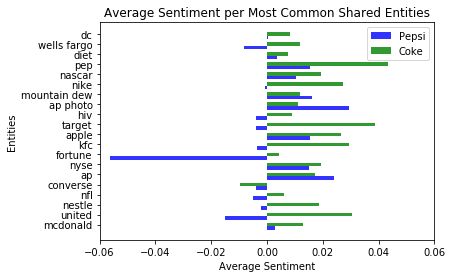

In [125]:
import numpy as np
import matplotlib.pyplot as plt
pepsi=[];
coke=[];
for i in range(0,20):
    pepsi.append(aveSentList[i][1]['Pepsi'])
    coke.append(aveSentList[i][1]['Coke'])

index = np.arange(20)
bar_width = 0.35
opacity = 0.8

rect1= plt.barh(index,pepsi,bar_width,alpha=opacity,color='b',label='Pepsi')
rect2 = plt.barh(index+bar_width,coke,bar_width,alpha=opacity,color='g',label='Coke')
plt.xlim([-0.06,0.06])
plt.yticks(index+bar_width,entList)
plt.ylabel('Entities')
plt.xlabel('Average Sentiment')
plt.title('Average Sentiment per Most Common Shared Entities')
plt.legend()
plt.show()